In [6]:
# from zf_unet_224_model import ZF_UNET_224, dice_coef_loss, dice_coef
# from tensorflow.keras.optimizers import Adam
import keras
import tensorflow

In [2]:
model = ZF_UNET_224()
model.load_weights('unet.h5')
optim = keras.optimizers.Adam()
model.compile(optimizer=optim, loss=dice_coef_loss, metrics=[dice_coef])

# model.fit(...)

AttributeError: module 'keras.backend' has no attribute 'image_dim_ordering'

In [7]:
from keras.applications.vgg19 import VGG19
vgg19_weights = 'vgg19_weights_tf_dim_ordering_tf_kernels.h5'
vgg19_model = VGG19(weights=vgg19_weights)
# _get_predictions(vgg19_model)

In [8]:
from tensorflow.keras import Sequential
model = Sequential()

In [9]:
model = Sequential()

for layer in vgg19_model.layers[:-1]: # this is where I changed your code
    model.add(layer)
    
for layer in model.layers:
    layer.trainable = False
    
# model.add(Dense(2, activation='softmax'))
model.build((1, 224, 224, 3))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (1, 224, 224, 3)          0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (1, 224, 224, 64)         1792      
_________________________________________________________________
module_wrapper_2 (ModuleWrap (1, 224, 224, 64)         36928     
_________________________________________________________________
module_wrapper_3 (ModuleWrap (1, 112, 112, 64)         0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (1, 112, 112, 128)        73856     
_________________________________________________________________
module_wrapper_5 (ModuleWrap (1, 112, 112, 128)        147584    
_________________________________________________________________
module_wrapper_6 (ModuleWrap (1, 56, 56, 128)          0

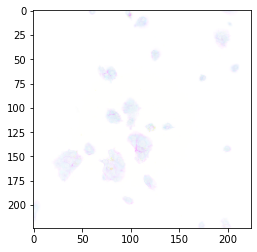

In [42]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

imges = []
for i in range(24):

    img = cv2.imread('../src/data/images/your_file'+str(i)+'.jpeg')

    img = cv2.resize(img, (224, 224))
    imges.append(img)
images = np.array(imges)
plt.imshow(img)
plt.show()


In [28]:
images.shape

(24, 224, 224, 3)

In [41]:
w = model.predict(images)

In [44]:
w = w.astype('float64')
w.dtype

dtype('float64')

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(w)
pca_result


array([[ 13.47137831,  -8.87129911,   2.33439563],
       [-16.36900797,  -7.48671102,  -6.62130598],
       [ 13.62477086,  -9.23676532,   3.59371547],
       [-14.12304789,  -7.16510229,  -7.17887622],
       [ -9.40537854,  -5.31795757,   7.64719293],
       [ -9.62722748,  -3.5679946 ,   7.23821737],
       [ 14.96275463,   5.37366704,  -3.0195485 ],
       [-12.06114768,  10.56609927,   0.17983696],
       [  3.4024238 ,   4.46237576,   2.70436776],
       [  7.6599043 ,   4.21180272,   0.31630554],
       [-12.63311205,   9.66648804,   0.15174898],
       [ 17.73566516,   4.34437464,  -4.51239146],
       [ 15.29746684,   4.3969499 ,  -2.36525411],
       [ -9.77581586,  10.43727042,   0.04490539],
       [  3.7102015 ,   3.80740622,   2.7393835 ],
       [  7.07957124,   4.12522445,   0.42765495],
       [-10.12243375,   9.52811322,   0.10685651],
       [ 18.03707841,   3.79829446,  -3.96708961],
       [-11.36606355,  -3.31400755,   6.77771983],
       [-10.95091654,  -1.66072

In [60]:
pca.explained_variance_ratio_

array([0.66268942, 0.17741158, 0.07781567])

In [66]:
import pandas as pd
df = pd.DataFrame(w)
df

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.0,0.0,0.0,0.000000,0.0,0.708807,1.367516,0.0,0.000000,0.0,...,0.0,0.555963,0.568158,0.0,0.0,1.635580,0.0,0.0,0.638108,1.500749
1,0.0,0.0,0.0,0.800182,0.0,0.330964,2.847420,0.0,0.000000,0.0,...,0.0,1.808511,1.017043,0.0,0.0,1.053903,0.0,0.0,0.000000,1.888336
2,0.0,0.0,0.0,0.000000,0.0,0.594682,1.374022,0.0,0.000000,0.0,...,0.0,0.548167,0.390216,0.0,0.0,1.579844,0.0,0.0,0.653204,1.551101
3,0.0,0.0,0.0,0.551077,0.0,0.491601,2.488957,0.0,0.000000,0.0,...,0.0,1.751822,1.106702,0.0,0.0,1.008115,0.0,0.0,0.000000,2.254857
4,0.0,0.0,0.0,0.693049,0.0,0.521068,2.503141,0.0,0.000000,0.0,...,0.0,1.356757,0.679436,0.0,0.0,1.718276,0.0,0.0,0.000000,2.290044
5,0.0,0.0,0.0,0.510441,0.0,0.474146,2.380908,0.0,0.000000,0.0,...,0.0,1.388588,0.812790,0.0,0.0,1.706299,0.0,0.0,0.000000,2.722991
6,0.0,0.0,0.0,0.252598,0.0,1.177977,1.465698,0.0,0.333089,0.0,...,0.0,0.332128,0.117858,0.0,0.0,1.965544,0.0,0.0,0.000000,1.337248
7,0.0,0.0,0.0,1.266144,0.0,0.959939,2.496719,0.0,0.692822,0.0,...,0.0,1.454507,0.309032,0.0,0.0,1.190346,0.0,0.0,0.000000,1.855580
8,0.0,0.0,0.0,0.402810,0.0,0.970779,1.943913,0.0,0.242178,0.0,...,0.0,0.857408,0.240720,0.0,0.0,1.545274,0.0,0.0,0.000000,1.857960
9,0.0,0.0,0.0,0.389748,0.0,0.922382,2.080486,0.0,0.253787,0.0,...,0.0,0.514123,0.119996,0.0,0.0,1.496216,0.0,0.0,0.103736,1.824463


In [72]:
N = 100
feat_cols = [ i for i in range(w.shape[1]) ]
rndperm = np.random.permutation(df.shape[0])
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.66268942 0.17741158 0.07781567]


In [73]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

tsne_results = tsne.fit_transform(data_subset)

[t-SNE] Computing 23 nearest neighbors...
[t-SNE] Indexed 24 samples in 0.000s...
[t-SNE] Computed neighbors for 24 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 24 / 24
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.589088
[t-SNE] KL divergence after 300 iterations: 0.704430


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

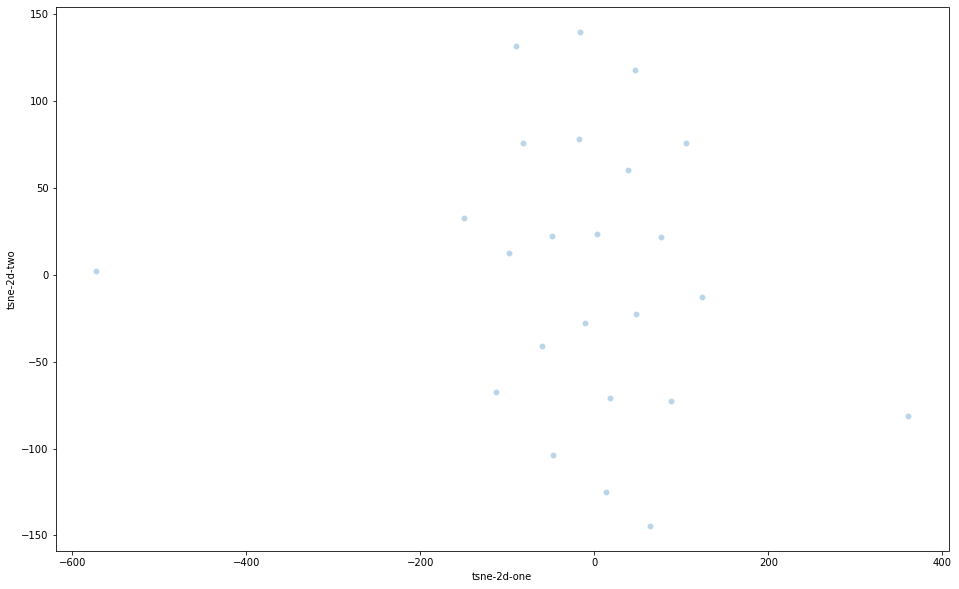

In [76]:
import seaborn as sns

df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
#     hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [1]:
# import torch
# 

In [3]:
# !pip install torchsummary

In [5]:
# # import torchvision.models as models
# import torch
# from torchsummary import summary

In [5]:
fcn_resnet101 = models.segmentation.fcn_resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to C:\Users\Krul/.cache\torch\checkpoints\resnet101-5d3b4d8f.pth
100%|████████████████████████████████| 178728960/178728960 [00:04<00:00, 37432609.46it/s]
Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to C:\Users\Krul/.cache\torch\checkpoints\fcn_resnet101_coco-7ecb50ca.pth
100%|████████████████████████████████| 217800805/217800805 [00:07<00:00, 29402233.79it/s]


In [12]:
import tensorflow as tf
from tensorflow import keras

In [53]:
# from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.resnet import ResNet50
model = ResNet50(weights="imagenet")
ResNet50_model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [54]:
w = ResNet50_model.predict(images)
w.shape

(24, 2048)

In [35]:
resnet_model = keras.applications.resnet.ResNet50(
#     include_top=True, 
    weights='imagenet', input_tensor=None,
    input_shape=(224, 224, 3), 
    pooling=None, classes=1000
)

In [28]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [37]:
name = 'avg_pool'
model2 = model(inputs=resnet_model.input, outputs = resnet_model.layers[-2].output)
model2.summary()

TypeError: call() got an unexpected keyword argument 'outputs'

In [46]:
from tensorflow.keras import Sequential
inputs = Input(shape=(224, 224, 3))
model = Sequential()
model.add(inputs)
for layer in resnet_model.layers[:-1]: # this is where I changed your code
    model.add(layer)
    
for layer in model.layers:
    layer.trainable = False
    
# model.add(Dense(2, activation='softmax'))
# model.build((1, 224, 224, 3))

model.summary()

NameError: name 'Input' is not defined

In [43]:
w = resnet_model.predict(images)
# resnet_model.summary()

In [44]:
w.shape

(24, 1000)

In [14]:
import pickle
import numpy as np

In [15]:
file = open('../data/features_dict.pkl', "rb")
features_dict = pickle.load(file)

In [26]:
import umap
import pandas as pd
from sklearn.manifold import TSNE

In [76]:
def features_preprocess(features_dict: dict, perplexity, early_exaggeration, learning_rate):
    filenames = np.array(list(features_dict.keys()))
    feat = np.array(list(features_dict.values()))
    feat = feat.reshape(-1, 4096)
    # pca = PCA(n_components=100, random_state=22)
    # pca.fit(feat)
    # data_after_pca = pca.transform(feat)
    standard_embedding = TSNE(n_components=2, learning_rate=learning_rate, init='random', random_state = 42, 
                              perplexity = perplexity, early_exaggeration = early_exaggeration).fit_transform(feat)
#     standard_embedding = umap.UMAP(random_state=42).fit_transform(feat)
#     print(standard_embedding)
    return pd.DataFrame({'Name': filenames, 'Vector1': standard_embedding[:, 0], 'Vector2': standard_embedding[:, 1]})

In [77]:
def prepare_info_df(df):
    df['Row'] = df['Name'].apply(lambda x: x[1:3]).apply(lambda x: chr(int(x) + 64))
    df['Column'] = df['Name'].apply(lambda x: x[4:6])
    df['F'] = df['Name'].apply(lambda x: x[7:9])
    df['Well'] = df['Row'] + df['Column']
    for channel_str in ['ch1', 'ch2', 'ch3', 'ch4']:  # here comes the problem
        df['Name'] = df['Name'].apply(lambda x: x.replace(channel_str, ''))
    df = df.drop_duplicates()
    well_df = pd.read_csv('E:\data\Cell-Painting-HepG2-Plate-Layouts.csv',
                          usecols=[0, 1, 2])
    df = df.merge(well_df)
    df.rename(columns={'Concentration [uM]': 'Concentration'}, inplace=True)
    return df

In [79]:
result = features_preprocess(features_dict, 30, 12, 200)
result = prepare_info_df(result)
result

,Name,Vector1,Vector2,Row,Column,F,Well,Compound,Concentration
0,r01c01f01p01-sk1fk1fl1.tiff,-5.307115,-12.456855,A,01,01,A01,Berberine Chloride,50.0
1,r01c01f04p01-sk1fk1fl1.tiff,-6.845675,3.686250,A,01,04,A01,Berberine Chloride,50.0
2,r01c01f07p01-sk1fk1fl1.tiff,14.920222,25.727381,A,01,07,A01,Berberine Chloride,50.0
3,r01c02f01p01-sk1fk1fl1.tiff,-3.456276,-10.445506,A,02,01,A02,Berberine Chloride,25.0
4,r01c02f04p01-sk1fk1fl1.tiff,20.025991,-7.131173,A,02,04,A02,Berberine Chloride,25.0
...,...,...,...,...,...,...,...,...,...
1147,r16c23f04p01-sk1fk1fl1.tiff,18.600180,19.691910,P,23,04,P23,DMSO,NaN
1148,r16c23f07p01-sk1fk1fl1.tiff,-6.543318,30.393469,P,23,07,P23,DMSO,NaN
1149,r16c24f01p01-sk1fk1fl1.tiff,-3.579003,11.167239,P,24,01,P24,DMSO,NaN
1150,r16c24f04p01-sk1fk1fl1.tiff,-5.618251,6.170328,P,24,04,P24,DMSO,NaN


In [80]:
import plotly.express as px
import plotly.graph_objects as go

In [81]:
def gen_fig(perplexity = 30, early_exaggeration = 12, learning_rate = 200):
    result = features_preprocess(features_dict, perplexity, early_exaggeration, learning_rate)
    result = prepare_info_df(result)
    fig = px.scatter(result, x = 'Vector1', y = 'Vector2', color = 'Compound')
    return fig
gen_fig().show()

In [82]:
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


In [86]:
app = JupyterDash(__name__)
app.layout = html.Div([
    html.Div([ 
        dcc.Graph(id='graph', figure=gen_fig())
    ]),
    html.Div([
        'perplexity',
        dcc.Slider(
        id='perplexity',
        min=0,
        max=50,
        step=0.5,
        value=30,
        tooltip={"placement": "right",
                "always_visible": True},
    ),
    ]),
    html.Div([
        'early_exaggeration',
        dcc.Slider(
        id='early_exaggeration',
        min=0,
        max=30,
        step=1,
        value=12,
        tooltip={"placement": "right",
            "always_visible": True},
    ),
    ]),
    html.Div([
        'learning_rate',
        dcc.Slider(
        id='learning_rate',
        min=100,
        max=1000,
        step=100,
        value=200,
        tooltip={"placement": "right",
            "always_visible": True},
    ),
    ])
    
])

In [87]:
@app.callback(
    Output('graph', 'figure'),
    [Input('perplexity', 'value'),
     Input('early_exaggeration', 'value'),
     Input('learning_rate', 'value'),])
def update_output(value1, value2, value3):
    return gen_fig(perplexity = value1, early_exaggeration = value2, learning_rate = value3)

In [88]:
app.run_server( port = 8070, dev_tools_ui=True, #debug=True,
              dev_tools_hot_reload =True, threaded=True)

Dash app running on http://127.0.0.1:8070/


C:\Users\Krul\Anaconda3\lib\site-packages\jupyter_dash\jupyter_app.py:139: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.

